In [2]:
import pandas as pd

### Udacity DSND Project 1: Exploring Airbnb Seattle Dataset

### Business Questions:
   1. What?
   2. What?
   3. What?

### 1. Read the dataset file

In [4]:
# Including full descriptions and average review score
seattle_listings_df = pd.read_csv("data/airbnb/seattle/listings.csv")
seattle_listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [30]:
seattle_listings_df.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

### 2. Clean the dataset

In [5]:
seattle_listings_df.isnull().mean().sort_values(ascending=False)

license                             1.000000
square_feet                         0.974594
monthly_price                       0.602672
security_deposit                    0.511262
weekly_price                        0.473808
notes                               0.420639
neighborhood_overview               0.270299
cleaning_fee                        0.269775
transit                             0.244631
host_about                          0.224987
host_acceptance_rate                0.202462
review_scores_accuracy              0.172342
review_scores_checkin               0.172342
review_scores_value                 0.171818
review_scores_location              0.171556
review_scores_cleanliness           0.171032
review_scores_communication         0.170508
review_scores_rating                0.169460
reviews_per_month                   0.164222
first_review                        0.164222
last_review                         0.164222
space                               0.149031
host_respo

In [6]:
seattle_listings_df.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       

In [7]:
seattle_listings_df = seattle_listings_df[['id', 'description', 'neighborhood_overview', 'neighbourhood']]
seattle_listings_df

,id,description,neighborhood_overview,neighbourhood
0,241032,Make your self at home in this charming one-be...,NaN,Queen Anne
1,953595,Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",Queen Anne
2,3308979,New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Queen Anne
3,7421966,A charming apartment that sits atop Queen Anne...,NaN,Queen Anne
4,278830,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,Queen Anne
5,5956968,We're renting out a small private unit of one ...,This part of Queen Anne has wonderful views an...,Queen Anne
6,1909058,Enjoy a quiet stay in our comfortable 1915 Cra...,"Close restaurants, coffee shops and grocery st...",Queen Anne
7,856550,"Our tiny cabin is private , very quiet and com...",We are centrally located between Downtown and ...,Queen Anne
8,4948745,"Nestled in the heart of the city, this space i...",Walking Score: 92 4 blocks from Kerry Park Fam...,Queen Anne
9,2493658,"Beautiful apartment in an extremely safe, quie...","Queen Anne is a wonderful, truly functional vi...",Queen Anne


In [8]:
seattle_listings_df.isnull()['neighbourhood'].mean()

0.10895756940806706

In [9]:
seattle_listings_df = seattle_listings_df.dropna(subset=['neighbourhood'], axis=0)
seattle_listings_df

,id,description,neighborhood_overview,neighbourhood
0,241032,Make your self at home in this charming one-be...,NaN,Queen Anne
1,953595,Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",Queen Anne
2,3308979,New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Queen Anne
3,7421966,A charming apartment that sits atop Queen Anne...,NaN,Queen Anne
4,278830,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,Queen Anne
5,5956968,We're renting out a small private unit of one ...,This part of Queen Anne has wonderful views an...,Queen Anne
6,1909058,Enjoy a quiet stay in our comfortable 1915 Cra...,"Close restaurants, coffee shops and grocery st...",Queen Anne
7,856550,"Our tiny cabin is private , very quiet and com...",We are centrally located between Downtown and ...,Queen Anne
8,4948745,"Nestled in the heart of the city, this space i...",Walking Score: 92 4 blocks from Kerry Park Fam...,Queen Anne
9,2493658,"Beautiful apartment in an extremely safe, quie...","Queen Anne is a wonderful, truly functional vi...",Queen Anne


In [10]:
neighbourhood_list_count = seattle_listings_df.groupby(['neighbourhood']).size()
neighbourhood_list_count.sort_values(ascending=False)[:5]

neighbourhood
Capitol Hill    351
Ballard         213
Belltown        204
Minor           192
Queen Anne      187
dtype: int64

In [11]:
neighbourhood = seattle_listings_df['neighbourhood']
len(set(neighbourhood))

81

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

seattle_listings_df = pd.read_csv("data/airbnb/seattle/listings.csv")
seattle_listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117614780>,
      dtype=object)

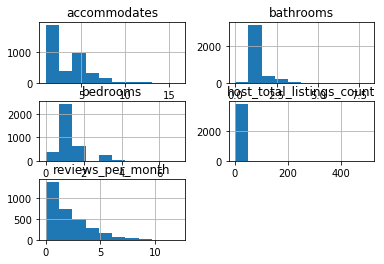

In [27]:
seattle_listings_df[['host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'reviews_per_month']].hist()

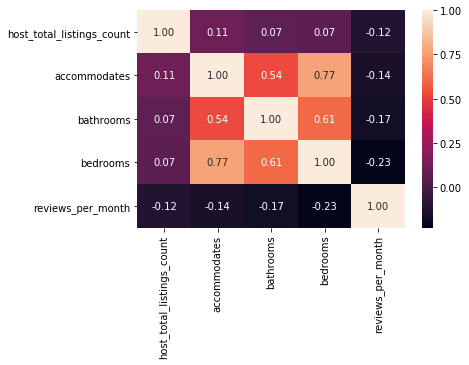

In [29]:
sns.heatmap(seattle_listings_df[['host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'reviews_per_month']].corr(), annot=True, fmt='.2f')

In [43]:
# Including unique id for each reviewer and detailed comments
seattle_reviews_df = pd.read_csv("data/airbnb/seattle/reviews.csv")
seattle_reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
